<a href="https://colab.research.google.com/github/knxghtly/python-tensorflow-MLDL-Study/blob/main/%5B3%5D%EC%84%A0%ED%98%95%ED%9A%8C%EA%B7%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 0. 데이터 준비

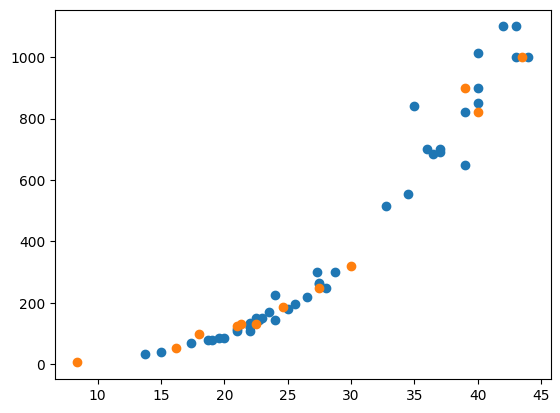

In [ ]:
# 회귀는 값을 예측하는 것임. -> target=임의의 숫자
# perch(농어)의 length로 weight를 예측하자. (input data는 length 하나)
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# data load
fish = pd.read_csv("https://bit.ly/fish_csv_data")
perch_length = fish[fish["Species"] == "Perch"]["Length"].to_numpy()
perch_weight = fish[fish["Species"] == "Perch"]["Weight"].to_numpy()

# train & test set
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(
    perch_length, perch_weight, test_size=0.2, random_state=42
)

# reshape: 회귀모델의 .fit메소드들은 _input이 2d
train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)

# draw
plt.scatter(train_input, train_target)
plt.scatter(test_input, test_target)
plt.show()

# 1. k-최근접 이웃 회귀

 - 회귀에서, 예측이 좋다 = $R^2$(결정계수)가 1에 가깝다
 - $R^2$(결정계수) = $1 - \frac{(\text{target}-\text{예측})^2\text{의 합}}{(\text{target}-\text{평균})^2\text{의 합}}$

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor()
knr.fit(train_input, train_target)
print(f"score(train_input): {knr.score(train_input, train_target)}")
print(f"score(test_input): {knr.score(test_input, test_target)}")

score(train_input): 0.9699886106745992
score(test_input): 0.9932626838364674


## 1-1. 모델이 얼마나 훈련을 잘 했는지?

 1. 평균 절대 오차 방법 (Mean Absolute Error, MAE)
  - 각 샘플에 대한 $|예측-실제|$ 의 평균
 2. 평균 제곱 오차 방법 (Mean Squared Error, MSE)
  - 각 샘플에 대한 $(예측-실제)^2$ 의 평균

In [ ]:
test_prediction = knr.predict(test_input) # 모델이 예측한 값

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
print(f"MAE(평균 절대 오차): {mean_absolute_error(test_target, test_prediction)}")
print(f"MSE(평균 제곱 오차): {mean_squared_error(test_target, test_prediction)}")

MAE(평균 절대 오차): 21.433333333333337
MSE(평균 제곱 오차): 784.7783333333333


## 1-2. 과대적합(overfitting) vs 과소적합(underfitting)

**과대적합(overfitting)**
 - 모델이 훈련 데이터에 너무 잘 맞춰져서, 훈련 데이터에 있는 세부적인 패턴까지 학습하고, 일반화 능력이 떨어지는 현상
 - 훈련 데이터에서는 성능이 좋지만, 테스트 데이터에서 성능이 떨어짐
 - k값을 늘려야 함

**과소적합(underfitting)**
 - 모델이 훈련 데이터에 너무 단순하게 적합되어, 중요한 패턴을 학습하지 못하는 현상
 - 훈련 데이터와 테스트 데이터 모두에서 성능이 낮음
 - k값을 줄여야 함

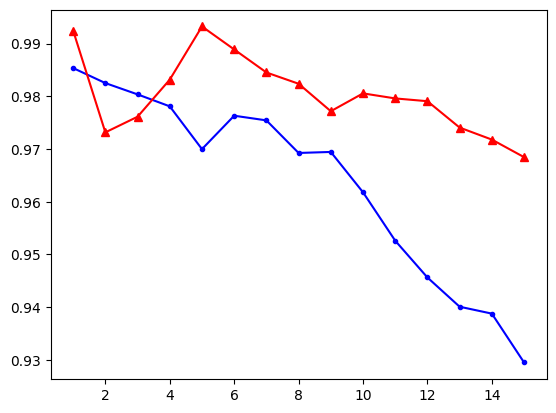

In [ ]:
train_scores = []
test_scores = []
def fitting(k):
  knr.n_neighbors = k
  knr.fit(train_input, train_target)
  train_scores.append(knr.score(train_input, train_target))
  test_scores.append(knr.score(test_input, test_target))

max_k = 15
for k in range(1, max_k+1): fitting(k)
plt.plot(range(1, max_k+1), train_scores, color="blue", marker=".")
plt.plot(range(1, max_k+1), test_scores, color="red", marker="^")

knr.n_neighbors=3

# 2. 다항 회귀 (Polynomial Regression)

##2-1. 1차
 - $y = ax + b$ where (a=.coef_, b=.intercept_)

예측값: [1238.3175398]
기울기: [39.05365447]
y절편: -714.3651839448922
train set 점수: 0.9363463656327585
test set 점수: 0.8359630155975616


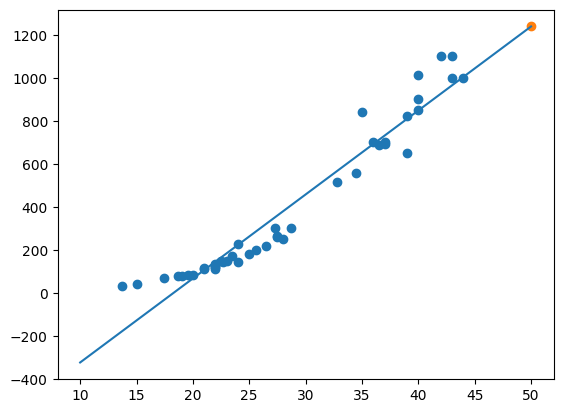

In [ ]:
# 선형 회귀: scaled하지 않고 진행
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(train_input, train_target)

predict_input = [50]
print("예측값:", lr.predict([predict_input]))
print("기울기:", lr.coef_)
print("y절편:", lr.intercept_)
# train & test set 점수
print(f"train set 점수: {lr.score(train_input, train_target)}")
print(f"test set 점수: {lr.score(test_input, test_target)}")

plt.scatter(train_input, train_target)
plt.scatter(predict_input, lr.predict([predict_input]))
domain = [10, 50]
plt.plot(domain, [lr.coef_[0] * domain[0] + lr.intercept_, lr.coef_[0] * domain[1] + lr.intercept_])
plt.show()

##2-2. 2차
 - 항을 만들어 고차식으로 만듬
 - y = ax^2 + bx + c
 - 변수(x) = length -> x^2항 만들기

length=50인 물고기의 weight는 얼마일까?
예측값: [1579.0440311]
기울기: [  1.03238928 -22.63525541]
y절편: 129.83360652841566


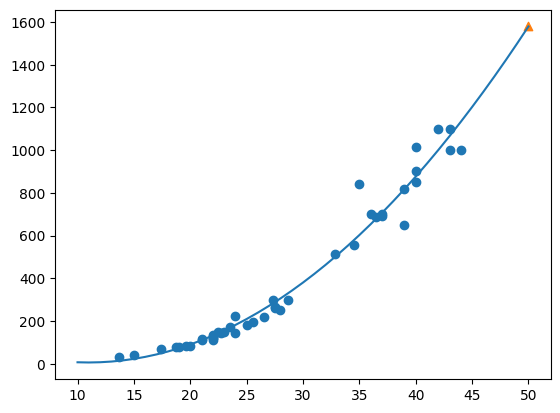

train set 점수: 0.9701854947585989
test set 점수: 0.9801885585527479


In [ ]:
train_poly = np.column_stack((train_input ** 2, train_input)) # (n_samples, 2)
test_poly = np.column_stack((test_input ** 2, test_input)) # (n_samples, 2)

lr = LinearRegression()
lr.fit(train_poly, train_target)

predict_input = 50
predict_poly = [predict_input ** 2, predict_input] # (n_samples, 2)
print(f"length={predict_input}인 물고기의 weight는 얼마일까?")
print("예측값:", lr.predict([predict_poly]))
print("기울기:", lr.coef_) # (1, 2(특성개수))
print("y절편:", lr.intercept_)

# 산점도 그리기
plt.scatter(train_input, train_target)
point = np.arange(domain[0], domain[1]+1) # 구간별 직선을 위한 5-69 정수배열
 # 산점도에 2차함수 그리기
plt.plot(point, lr.coef_[0] * point ** 2 + lr.coef_[1] * point + lr.intercept_)
plt.scatter(predict_input, lr.predict([predict_poly]), marker="^")
plt.show()

# train & test set 점수
print(f"train set 점수: {lr.score(train_poly, train_target)}")
print(f"test set 점수: {lr.score(test_poly, test_target)}")

# 3. 다중 회귀 (Multiple Regression)
 - 다중 회귀는 특성이 2개이상 (train_input이 2차원 이상)

In [ ]:
import pandas as pd

df = pd.read_csv("https://bit.ly/perch_csv")
perch_full = df.to_numpy() # 변수가 [length, height, width]: 3개

# 샘플 개수 비교
print("perch_full 개수:", perch_full.shape)
print("perch_weight 개수:", perch_weight.shape)

# train & test 데이터 나누기
train_input, test_input, train_target, test_target = train_test_split(
    perch_full, perch_weight, test_size=0.2, random_state=42
)

perch_full 개수: (56, 3)
perch_weight 개수: (56,)


##다항 특성 만들기 (PolynomialFeatures: Transformer의 일종)

 - Transformer에서 .fit은 학습이라기보단, parameter로 어떻게 조합할지 인식

 - 따라서, 특성의 개수만 맞다면 아무 데이터나 넣어도 상관없음.

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
pf = PolynomialFeatures(degree=2, include_bias=False) # 기본값 degree=2
train_poly = pf.fit_transform(train_input)
test_poly = pf.transform(test_input)
pf.get_feature_names_out() # 각 특성들이 어떻게 나왔는지 확인

array(['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2',
       'x2^2'], dtype=object)

In [ ]:
lr = LinearRegression()
lr.fit(train_poly, train_target)
print(train_poly.shape, train_target.shape)
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))

(44, 9) (44,)
0.9900974417605038
0.9766805886149327


## 3-1. 다중 회귀 - 더 많은 특성 만들기

In [ ]:
pf2 = PolynomialFeatures(degree=5, include_bias=False)
train_poly = pf2.fit_transform(train_input)
test_poly = pf2.transform(test_input)
print(train_poly.shape)

# training
lr.fit(train_poly, train_target)

# scoring
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))

# 특성이 너무 많아 매우 과대적합된 모델

(44, 55)
0.9999999999219743
-167.27004880370916


## 3-2. 규제 전 표준화

In [ ]:
# 규제하기 전, 특성의 scale을 표준화
from sklearn.preprocessing import StandardScaler
# Transformer의 일종: StandardScaler
ss = StandardScaler()
ss.fit(train_poly)

# 표준 점수로 변환된 train & test set
train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)

# 릿지 회귀 (Ridge Regression)와 라쏘 회귀 (Lasso Regression)

선형 회귀 모델에 정규화(Regularization)를 적용하여 과대적합(overfitting)을 방지
- **정규화 강도 $\lambda$:**(hyper parameter)

  $\lambda$ 값이 클수록 강한 정규화 효과, 모델의 계수들이 작아짐.

- **가중치(회귀 계수) $\beta$:**  
  각 특성(feature)의 영향력을 나타내는 회귀 계수.

- **목적:**  
  두 방법 모두 모델의 과도한 복잡도를 줄여 과대적합 방지, 일반화 성능 향상.

> **요약:**  
> - **릿지 회귀:** 모든 특성을 고려하되, 계수를 작게 만들어 과대적합을 방지
> - **라쏘 회귀:** 일부 특성을 0으로 만들어 **변수 선택 효과**, 해석이 용이한 모델을 만듬.

---

## 1. 릿지 회귀 (Ridge Regression)

- **정의:**  
  릿지 회귀는 L2 정규화를 적용한 선형 회귀 모델입니다.

- **패널티 항:**  
  $$
  \lambda \sum_{j=1}^{p} \beta_j^2
  $$

- **특징:**  
  - 모든 회귀 계수를 작게 만들어 모델의 복잡도를 줄입니다.
  - 계수들을 0에 가깝게 만들지만, 완전히 0으로 만들지는 않습니다.
  - 다중공선성이 있는 경우에도 안정적인 예측을 제공합니다.
---

In [ ]:
# Ridge Regression : Estimator
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=1)
ridge.fit(train_scaled, train_target)

# scoring
print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled, test_target))

0.9896004835191297
0.9789200583251785


### 적절한 규제 강도(alpha) 찾기

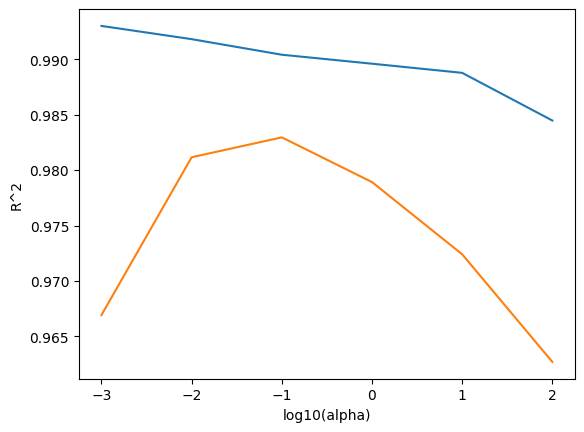

0.9904101980758971
0.9829550564532396


In [ ]:
train_score, test_score = [], []
alpha_list = np.logspace(-3, 2, num=6)
for alpha in alpha_list:
  ridge = Ridge(alpha=alpha)
  ridge.fit(train_scaled, train_target)
  train_score.append(ridge.score(train_scaled, train_target))
  test_score.append(ridge.score(test_scaled, test_target))

plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel("log10(alpha)")
plt.ylabel("R^2")
plt.show()

# 가장 좋은 alpha
ridge = Ridge(alpha=0.1)
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled, test_target))

---
## 2. 라쏘 회귀 (Lasso Regression)

- **정의:**  
  라쏘 회귀는 L1 정규화를 적용한 선형 회귀 모델입니다.

- **패널티 항:**  
  $$
  \lambda \sum_{j=1}^{p} |\beta_j|
  $$

- **특징:**  
  - 일부 회귀 계수를 정확히 0으로 만들어 **특성 선택(feature selection)** 효과가 있습니다.
  - 불필요한 특성을 제거함으로써 모델 해석을 용이하게 합니다.
  - 변수 선택이 중요한 경우에 유용합니다.


In [ ]:
# Lasso : Estimator
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=1)
lasso.fit(train_scaled, train_target)

# scoring
print(lasso.score(train_scaled, train_target))
print(lasso.score(test_scaled, test_target))

0.9897812228260618
0.9800354016844837


### 적절한 규제 강도(alpha) 찾기

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.347e+04, tolerance: 5.214e+02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.032e+04, tolerance: 5.214e+02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.202e+02, tolerance: 5.214e

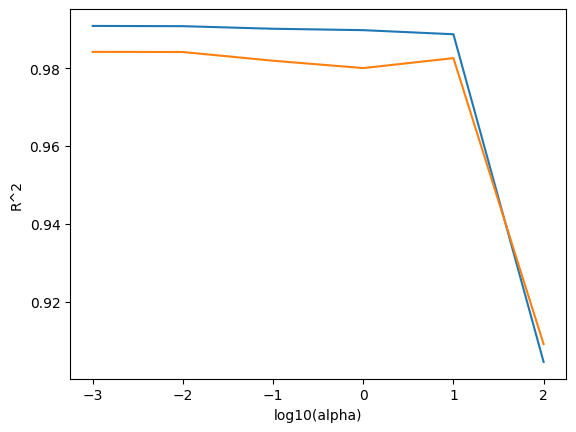

0.9901413855189082
0.9819224233869336
사용하지 않는 특성 개수: 35


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.202e+02, tolerance: 5.214e+02
  model = cd_fast.enet_coordinate_descent(


In [ ]:
train_score, test_score = [], []
alpha_list = np.logspace(-3, 2, num=6)
for alpha in alpha_list:
  lasso = Lasso(alpha=alpha)
  lasso.fit(train_scaled, train_target)
  train_score.append(lasso.score(train_scaled, train_target))
  test_score.append(lasso.score(test_scaled, test_target))

plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel("log10(alpha)")
plt.ylabel("R^2")
plt.show()

# 가장 좋은 alpha
lasso = Lasso(alpha=0.1)
lasso.fit(train_scaled, train_target)
print(lasso.score(train_scaled, train_target))
print(lasso.score(test_scaled, test_target))

# 사용하지 않는 특성 개수 확인
print(f"사용하지 않는 특성 개수:", np.sum(lasso.coef_ == 0))